# Import Data

First thing first.  I import my data and look at the possible variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

from sklearn.linear_model import SGDRegressor, LogisticRegression, ElasticNetCV, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


In [2]:
train_location = "/Users/jperryman/Desktop/BYU/Python/HW2/train.csv"
test_location = "/Users/jperryman/Desktop/BYU/Python/HW2/test.csv"

train = pd.read_csv(train_location)
test = pd.read_csv(test_location)
target = train.SalePrice.values

In [3]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
print(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The only variable that is not in the test data is "SalePrice".  This is good because it ensures that my train data will not overfit my test data.

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


I want to make sure that my data does not have any duplicates.

In [6]:
# Check for duplicates
idsUnique = len(set(train.Id))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 1460 total entries


In [7]:
#categorical data is replaced with either 'None' or the most common value, depending on which makes more sense
train.loc[train['Alley'].isnull(),'Alley'] = "None"
train.loc[train['MasVnrType'].isnull(),'MasVnrType'] = "None"
train.loc[train['BsmtQual'].isnull(),'BsmtQual'] = "None"
train.loc[train['BsmtCond'].isnull(),'BsmtCond'] = "None"
train.loc[train['BsmtExposure'].isnull(),'BsmtExposure'] = "None"
train.loc[train['BsmtFinType1'].isnull(),'BsmtFinType1'] = "None"
train.loc[train['BsmtFinType2'].isnull(),'BsmtFinType2'] = "None"
train.loc[train['Electrical'].isnull(),'Electrical'] = "SBrkr"
train.loc[train['FireplaceQu'].isnull(),'FireplaceQu'] = "None"
train.loc[train['GarageType'].isnull(),'GarageType'] = "None"
train.loc[train['GarageFinish'].isnull(),'GarageFinish'] = "None"
train.loc[train['GarageQual'].isnull(),'GarageQual'] = "None"
train.loc[train['GarageCond'].isnull(),'GarageCond'] = "None"
train.loc[train['PoolQC'].isnull(),'PoolQC'] = "None"
train.loc[train['Fence'].isnull(),'Fence'] = "None"
train.loc[train['MiscFeature'].isnull(),'MiscFeature'] = "None"

#numeric data is replaced with either 0 or the mean of the training data in that column
train.loc[train['LotFrontage'].isnull(),'LotFrontage'] = train['LotFrontage'].mean()
train.loc[train['MasVnrArea'].isnull(),'MasVnrArea'] = 0
train.loc[train['GarageYrBlt'].isnull(),'GarageYrBlt'] = train['GarageYrBlt'].mean()

In [8]:
#categorical data is replaced with either 'None' or the most common value, depending on which makes more sense
test.loc[test['Alley'].isnull(),'Alley'] = "None"
test.loc[test['MasVnrType'].isnull(),'MasVnrType'] = "None"
test.loc[test['BsmtQual'].isnull(),'BsmtQual'] = "None"
test.loc[test['BsmtCond'].isnull(),'BsmtCond'] = "None"
test.loc[test['BsmtExposure'].isnull(),'BsmtExposure'] = "None"
test.loc[test['BsmtFinType1'].isnull(),'BsmtFinType1'] = "None"
test.loc[test['BsmtFinType2'].isnull(),'BsmtFinType2'] = "None"
test.loc[test['Electrical'].isnull(),'Electrical'] = "SBrkr"
test.loc[test['FireplaceQu'].isnull(),'FireplaceQu'] = "None"
test.loc[test['GarageType'].isnull(),'GarageType'] = "None"
test.loc[test['GarageFinish'].isnull(),'GarageFinish'] = "None"
test.loc[test['GarageQual'].isnull(),'GarageQual'] = "None"
test.loc[test['GarageCond'].isnull(),'GarageCond'] = "None"
test.loc[test['PoolQC'].isnull(),'PoolQC'] = "None"
test.loc[test['Fence'].isnull(),'Fence'] = "None"
test.loc[test['MiscFeature'].isnull(),'MiscFeature'] = "None"
test.loc[test['MSZoning'].isnull(),'MSZoning'] = "RL"
test.loc[test['Utilities'].isnull(),'Utilities'] = "AllPub"
test.loc[test['Exterior1st'].isnull(),'Exterior1st'] = "VinylSd"
test.loc[test['Exterior2nd'].isnull(),'Exterior2nd'] = "VinylSd"
test.loc[test['KitchenQual'].isnull(),'KitchenQual'] = "TA"
test.loc[test['Functional'].isnull(),'Functional'] = "Typ"
test.loc[test['SaleType'].isnull(),'SaleType'] = "WD"

#numeric data is replaced with either 0 or the mean of the training data in that column
test.loc[test['LotFrontage'].isnull(),'LotFrontage'] = train['LotFrontage'].mean()
test.loc[test['MasVnrArea'].isnull(),'MasVnrArea'] = 0
test.loc[test['GarageYrBlt'].isnull(),'GarageYrBlt'] = train['GarageYrBlt'].mean()
test.loc[test['BsmtFinSF1'].isnull(),'BsmtFinSF1'] = 0
test.loc[test['BsmtFinSF2'].isnull(),'BsmtFinSF2'] = 0
test.loc[test['BsmtUnfSF'].isnull(),'BsmtUnfSF'] = 0
test.loc[test['TotalBsmtSF'].isnull(),'TotalBsmtSF'] = 0
test.loc[test['BsmtFullBath'].isnull(),'BsmtFullBath'] = 0
test.loc[test['BsmtHalfBath'].isnull(),'BsmtHalfBath'] = 0
test.loc[test['GarageCars'].isnull(),'GarageCars'] = 0
test.loc[test['GarageArea'].isnull(),'GarageArea'] = 0

# Analyze Sale Price

Now that I have my data I want to look at what I am trying to predict: 'SalePrice'. I want summary statistics and I want to look at the distribution to make sure nothing looks funny.

In [9]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

This is great.  The standard deviation seems reasonable for home prices and there is no home valued at $0.  The max is pretty high so we should expect a skewed model

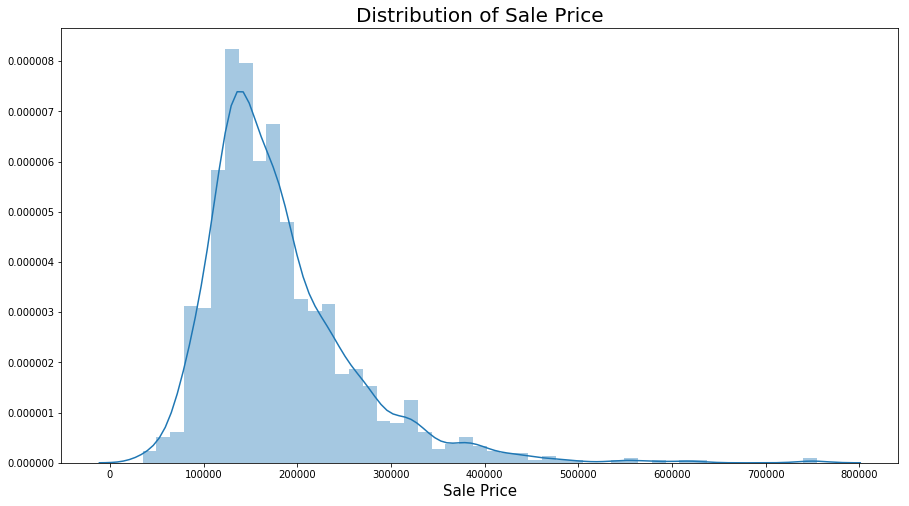

In [10]:
f, ax = plt.subplots(figsize=(15, 8))

plt.xlabel('Sale Price', fontsize=15)
plt.title('Distribution of Sale Price', fontsize=20)

sns.distplot(train.SalePrice, axlabel=False)

In [11]:
# Check missing values.
train.SalePrice.isnull().value_counts()

False    1460
Name: SalePrice, dtype: int64

In [12]:
print("Skewness: %f" % train['SalePrice'].skew())

Skewness: 1.882876


There is not too much to clean up with the data.  There are no missing values in sale price and sale price is evenly distributed.  It looks like the sample is skewed to the right, but that is not a huge problem.

Using the log of sales prices will give me a better distribution (hopefully).

In [13]:
train['SalePrice'] = np.log(train['SalePrice'])

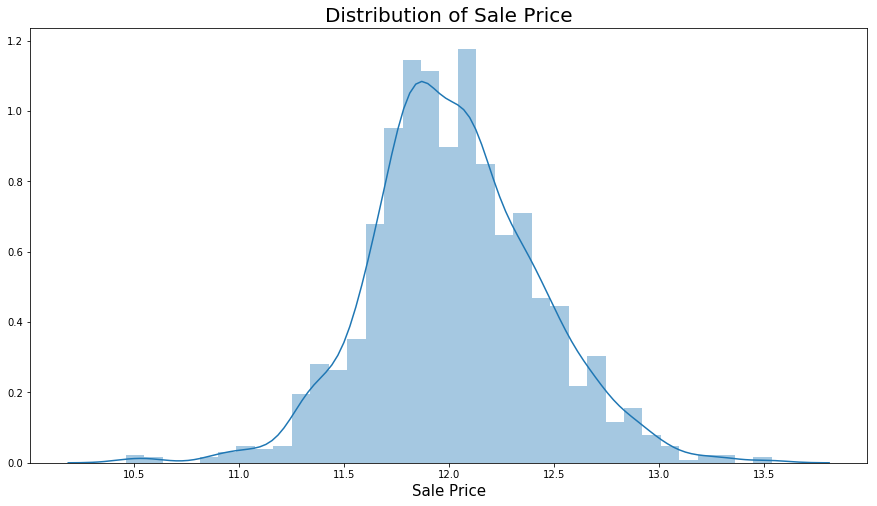

In [14]:
f, ax = plt.subplots(figsize=(15, 8))

plt.xlabel('Sale Price', fontsize=15)
plt.title('Distribution of Sale Price', fontsize=20)

sns.distplot(train.SalePrice, axlabel=False)

Awesome! It looks like using the log helped even out my distribution.

Now I want to see how SalePrice reacts to certain variables that I believe are correlated with it.

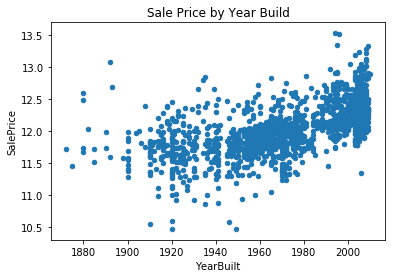

In [15]:
#scatter plot YearBuilt/saleprice
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(title='Sale Price by Year Build', x=var, y='SalePrice');

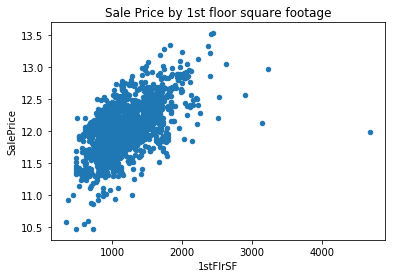

In [16]:
#scatter plot 1stFlrSF/saleprice
var = '1stFlrSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(title='Sale Price by 1st floor square footage', x=var, y='SalePrice');

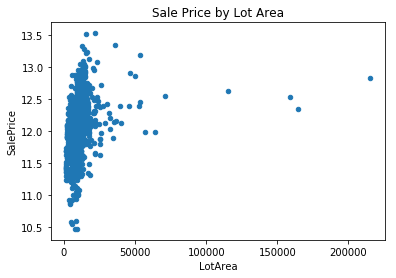

In [17]:
#scatter plot lotarea/saleprice
var = 'LotArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(title='Sale Price by Lot Area', x=var, y='SalePrice');

This is an example of a variable with large outliers.  I need to fix this to prevent overfitting.

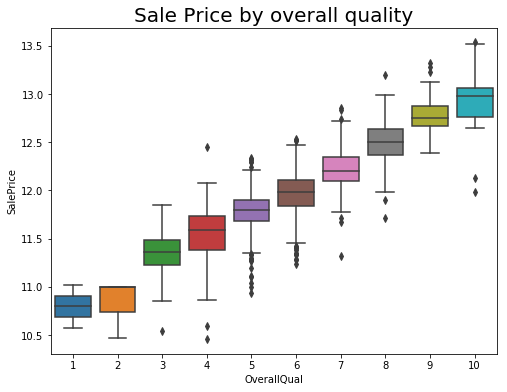

In [18]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.title('Sale Price by overall quality', fontsize=20)
fig = sns.boxplot(x=var, y="SalePrice", data=data);

Wow! Overall quality looks like a straight line.  If I had to guess I would say that this single variable has the highest correlation with price.

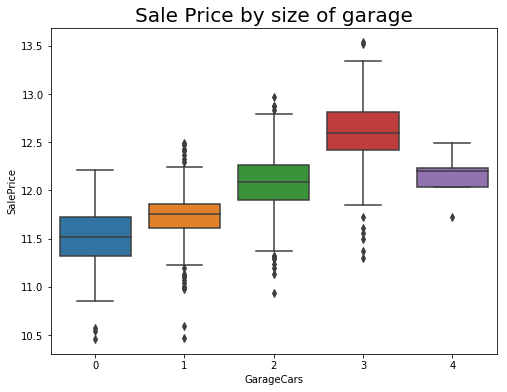

In [19]:
#box plot overallqual/saleprice
var = 'GarageCars'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.title('Sale Price by size of garage', fontsize=20)
fig = sns.boxplot(x=var, y="SalePrice", data=data);

# Focus on Correlation

Looking at each individual variable will take me forever.  To speed up this process and to make more effective conclusions I will create a heatmap.

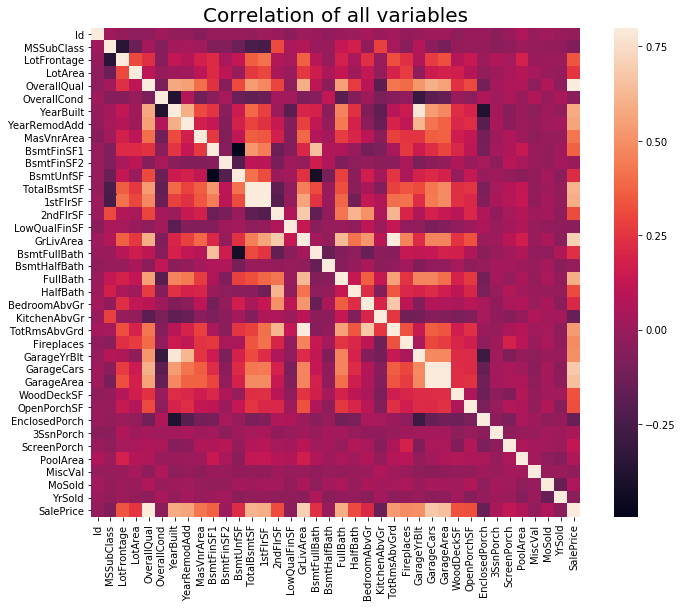

In [20]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
plt.title('Correlation of all variables', fontsize=20)
sns.heatmap(corrmat, vmax=.8, square=True);

Using the heatmap we can see large white 2x2 boxes showing multicollinearity in "TotalBsmtSF' and "1stFlrSF" as well as "GarageCars" and "GarageArea".  Essentially we learn that theses variables tell us the same things.

We also can see the bottom row or the last colummn.  These lines do a great job showing us what variables are highly correlated with SalePrice.

The map is helpful but not extremely organized.  I want to look at a list of variables sorted by highest to lowest correlation.

In [21]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489449
MasVnrArea       0.426775
BsmtFinSF1       0.372023
LotFrontage      0.336156
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    

Here I delete variable that do not seem to have any relation to price.

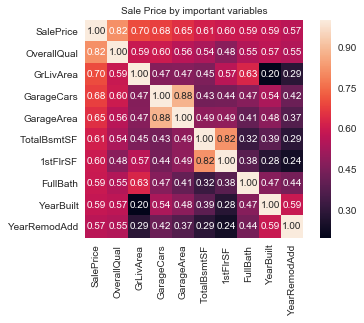

In [22]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.00)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Sale Price by important variables', fontsize=10)
plt.show()

This second heatmap organized my data better.  Here I can see the the variables that have the highest correlation in relation to SalesPrice.

These variables are very helpful.  I want to get a closer look at these variables so I will use another scatterplot.

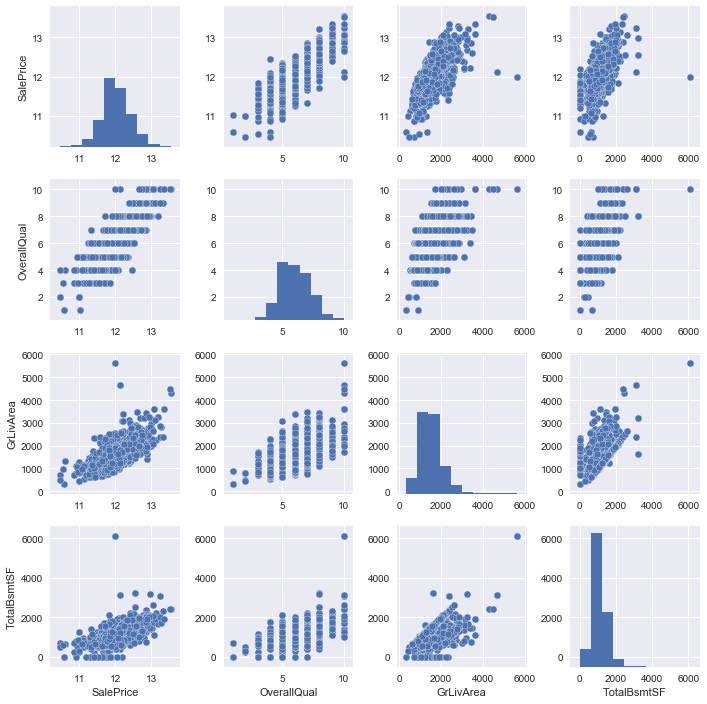

In [23]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# Outliers

As previously noted this data has outliers.  Now I must find the outliers and figure out how to fix them.  The two variables with obvious outliers are TotalBsmtSF and GrLiv Area, so lets look at those.

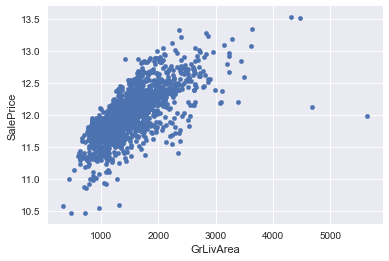

In [24]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

There are a couple of outliers in the bottom right.  These points do not follow the rest of the data.

In [25]:
#deleting points
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

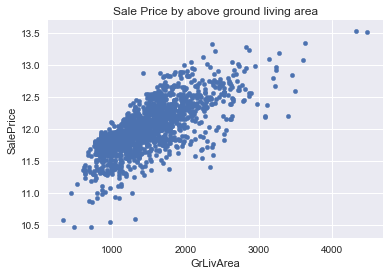

In [26]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(title='Sale Price by above ground living area', x=var, y='SalePrice');

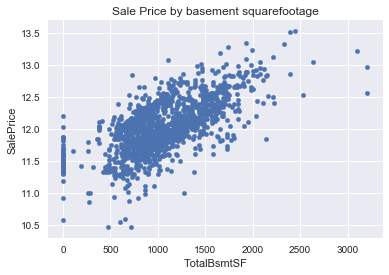

In [27]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(title='Sale Price by basement squarefootage', x=var, y='SalePrice');

# Missing Data

    I start by finding all of the missing data.

In [28]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


In [29]:
#missing data
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SaleCondition,0,0.0
SaleType,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


Luckily most of the missing data belongs to variables that I do not care about.  The only variables that seem so be important are the ones that inolve the garage.  Luckily we have the GarageArea and GarageCars variable which seem to be correlated to the other garage variables.

In short I feel confident that I can drop all of the data.

In [30]:
#dealing with missing data
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() #just checking that there's no missing data

0

In [31]:
#dealing with missing data
test = test.drop((missing_data[missing_data['Total'] > 1]).index,1)
test = test.drop(test.loc[test['Electrical'].isnull()].index)
test.isnull().sum().max() #just checking that there's no missing data


0

It looks like there are no extreme outliers in this set now after dropping variables.  Now I will create a new variable that I believe will be helpful.

Text(0.5,0,'Total Square Footage')

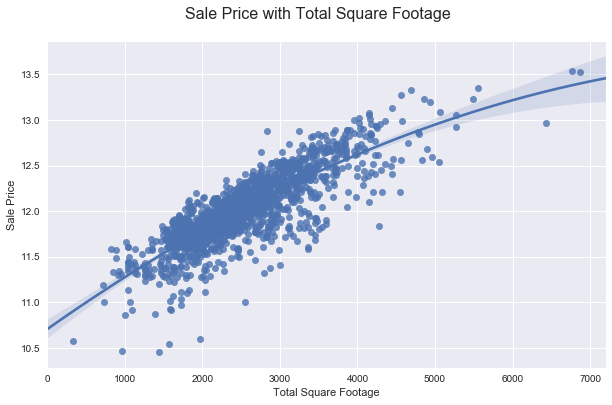

In [32]:
# Make a total square footage variable.
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
# Scatter to see what the data look like.
# Initialize the plot.
fig, ax = plt.subplots(figsize=(10, 6))

# Set the title.
fig.suptitle('Sale Price with Total Square Footage', fontsize=16, y=.96)

# Set the plot.
sns.regplot(y=train.SalePrice, x=train.TotalSF, order=2, ax=ax)

# Fix the axis labels.
ax.set_ylabel('Sale Price')
ax.set_xlabel('Total Square Footage')

Excellent Square Footage seems strongly correlated with decreasing marginal returns.  Now I need to take some data that is numerical data that is categorical and fix it to be read as a string.

In [35]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 29
Categorical features : 43


In [36]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = test.select_dtypes(include = ["object"]).columns
numerical_features = test.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = test[numerical_features]
train_cat = test[categorical_features]

Numerical features : 29
Categorical features : 43


In [37]:
def missing_data():
    NA = test.columns[test.isnull().any()].tolist()
    return NA

test[missing_data()].isnull().sum()

Series([], dtype: float64)

In [38]:
test['TotalSF'] = test['TotalSF'].fillna(test['TotalSF'].mean)
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean)
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean)
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean)
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean)

In [39]:
def missing_data():
    NA = test.columns[test.isnull().any()].tolist()
    return NA

test[missing_data()].isnull().sum()

Series([], dtype: float64)

# Model

In [40]:
#identify columns in train not found in test
train.columns.difference(test.columns)

Index(['SalePrice'], dtype='object')

In [41]:
#identify columns in test not found in train
test.columns.difference(train.columns)

Index([], dtype='object')

In [42]:
#drop columns from test not found in train
for col in test.columns.difference(train.columns):
    test = test.drop(col, axis=1)
    
test.head()

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,TotalSF
0,1461,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,140,0,0,120,None,MnPrv,None,WD,Normal,1778.0
1,1462,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,393,36,0,0,None,None,Gar2,WD,Normal,2658.0
2,1463,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,212,34,0,0,None,MnPrv,None,WD,Normal,2557.0
3,1464,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,...,360,36,0,0,None,None,None,WD,Normal,2530.0
4,1465,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,...,0,82,0,144,None,None,None,WD,Normal,2560.0


Now I can convert all of my categorical variables into dummy variables

In [57]:
#get dummy variables for categorical data in test
test = pd.get_dummies(test)

In [58]:
target= train.SalePrice
test_df = test.drop(['Id'], axis=1)

In [59]:
train_df = train.drop(['SalePrice'], axis = 1)
train_df = train_df.drop(['Id'], axis = 1)

In [60]:
missing_train = train_df.columns.difference(test_df.columns)

In [61]:
train_df = train_df.drop(missing_train, axis=1)

In [62]:
missing_test = test_df.columns.difference(train_df.columns)

In [63]:
test_df = test_df.drop(missing_test, axis=1)

In [64]:
numerical = list(train_df.select_dtypes(exclude=['object']))
len(numerical)

scaler = StandardScaler()
scaler.fit(train_df[numerical])
train_df[numerical] = scaler.transform(train_df[numerical])
train_df.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,TotalSF
0,-0.230217,-0.203934,0.658506,1.052959,0.880362,0.523937,0.617283,-0.943795,-0.473766,-0.814309,...,0.921812,-0.952231,1.023140,0.313159,0.357973,-0.750831,0.225982,-0.359603,-0.270407,0.011436
1,0.482939,-0.087252,-0.068293,0.158428,-0.428115,-0.570739,1.245719,-0.640584,0.504925,0.277348,...,-0.316329,0.605965,-0.102857,0.313159,-0.056795,1.627328,-0.708304,-0.359603,-0.270407,-0.042838
2,-0.087585,0.080162,0.658506,0.986698,0.831900,0.334044,0.108989,-0.301168,-0.319490,-0.642225,...,-0.316329,0.605965,0.939733,0.313159,0.640770,-0.750831,-0.065025,-0.359603,-0.270407,0.192351
3,-0.467935,-0.092325,0.658506,-1.862551,-0.718888,-0.570739,-0.514826,-0.061314,-0.714823,-0.531984,...,0.302742,0.605965,0.814622,1.652119,0.801022,-0.750831,-0.172238,4.089589,-0.270407,-0.108743
4,0.673114,0.385566,1.385305,0.953567,0.734975,1.384039,0.499451,-0.174452,0.222888,-0.037243,...,1.540882,0.605965,0.898029,1.652119,1.715398,0.781406,0.578253,-0.359603,-0.270407,1.015514


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, train['SalePrice'], test_size=0.33, random_state=42)

In [66]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [67]:
score = cross_val_score(lasso, train_df, target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.88 (+/- 0.01)


In [68]:
GB = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [69]:
score = cross_val_score(GB, train_df, target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.89 (+/- 0.01)


In [72]:
RT = RandomForestRegressor()

In [73]:
score = cross_val_score(RT, train_df, target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.85 (+/- 0.02)


In [74]:
Lasso_model = lasso.fit(train_df, target)

In [75]:
GB_model = GB.fit(train_df, target)

In [79]:
prediction = GB.predict(test_df)

In [80]:
submit = pd.DataFrame({'Id': test.Id, 'SalePrice': prediction})
submit.to_csv('housing.csv', index=False)